In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from moleculekit.molecule import Molecule
import glob
import os.path
import ray

def tweak_ca(outdir, d):
    m=Molecule(f"/workspace7/toni_cath/dompdb/{d}", type="pdb")
    m.filter('name CA')
    m.write(f"{outdir}/{os.path.basename(d)}.pdb")

## Create a dataset with levels

### Dataset

In [3]:
s = pd.read_csv("/workspace7/torchmd-AD/carles_cath/statistics.log",sep=" ", index_col=False)
s

,PDB,NRES,DOMAT
0,153lA00,185,1432
1,16pkA02,208,1551
2,1a05A00,357,2692
3,1a0aA00,63,498
4,1a0hA01,89,698
...,...,...,...
5394,2losA00,112,1641
5395,1hn0A04,122,973
5396,2oy8A02,139,1094
5397,3mhsB00,91,706


## Sort the dataset

In [4]:
s_sort = s[:512].sort_values(['NRES'])
s_sort

,PDB,NRES,DOMAT
326,1gaxA04,50,398
221,1e8rA00,50,721
23,1a92A00,50,423
478,1jfkA02,50,792
135,1ceuA00,51,854
...,...,...,...
222,1e8uA00,446,3445
307,1fwxA01,467,3661
82,1bf2A02,474,3659
125,1c7tA03,484,3912


## Create the dataset with 64 proteins

Text(0.5, 0, ' Atoms')

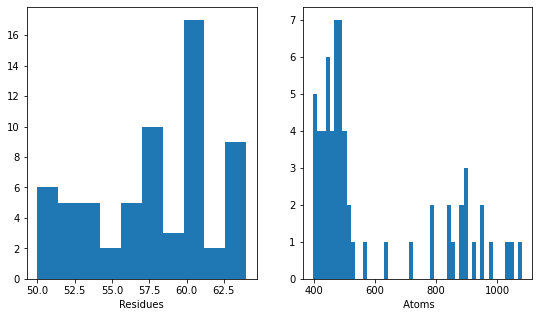

In [42]:
s_sort_64 = s_sort[:64]
plt.figure(figsize=(14,5))

plt.subplot(1,3,1)
plt.hist(s_sort_64.NRES, bins=10)
plt.xlabel("Residues")

plt.subplot(1,3,2)
plt.hist(s_sort_64.DOMAT, bins=50)
plt.xlabel(" Atoms")

### Create 4 levels

In [32]:
n = 0
i = 0
for index, row in s_sort[:64].iterrows():
    prot = row['PDB']
    outdir = f'9b_good_train/short_levels/level_{n}/ground_truth'
    tweak_ca(outdir, prot)
    i += 1
    if (i % 16) == 0:
        n += 1
        

2022-01-31 18:11:26,905 - moleculekit.molecule - INFO - Removed 348 atoms. 50 atoms remaining in the molecule.
2022-01-31 18:11:26,956 - moleculekit.readers - WARNING - Atoms with names "HE21" "HE22" were guessed as element H but could also be He (helium). If this is a case, you can correct them with mol.set('element', 'He', sel='name "HE21" "HE22"')
2022-01-31 18:11:26,957 - moleculekit.readers - WARNING - Atoms with names "HG11" "HG12" "HG13" "HG21" "HG22" "HG23" were guessed as element H but could also be Hg (mercury). If this is a case, you can correct them with mol.set('element', 'Hg', sel='name "HG11" "HG12" "HG13" "HG21" "HG22" "HG23"')
2022-01-31 18:11:26,989 - moleculekit.molecule - INFO - Removed 671 atoms. 50 atoms remaining in the molecule.
2022-01-31 18:11:27,064 - moleculekit.molecule - INFO - Removed 373 atoms. 50 atoms remaining in the molecule.
2022-01-31 18:11:27,114 - moleculekit.readers - WARNING - Atoms with names "HE21" "HE22" were guessed as element H but could a

## Create the dataset with 128 proteins

Text(0.5, 0, ' Atoms')

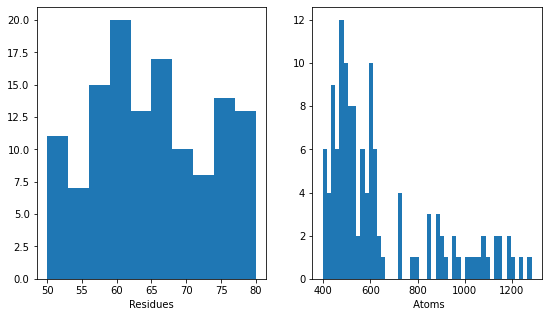

In [5]:
s_sort_128 = s_sort[:128]
plt.figure(figsize=(14,5))

plt.subplot(1,3,1)
plt.hist(s_sort_128.NRES, bins=10)
plt.xlabel("Residues")

plt.subplot(1,3,2)
plt.hist(s_sort_128.DOMAT, bins=50)
plt.xlabel(" Atoms")

In [ ]:
levels = [0,1,2,3,4,5,6,7]
i = 0
prot_x_level = len(s_sort_128) // len(levels)
for index, row in s_sort_128.iterrows():
    prot = row['PDB']
    [tweak_ca(f'/workspace7/torchmd-AD/carles_cath/9b_good_train/short_128_levels/level_{n}/ground_truth', prot) for n in levels]
    i += 1
    if (i % prot_x_level) == 0:
        levels.pop(0)

2022-02-02 22:27:26,906 - moleculekit.molecule - INFO - Removed 348 atoms. 50 atoms remaining in the molecule.
2022-02-02 22:27:26,960 - moleculekit.molecule - INFO - Removed 348 atoms. 50 atoms remaining in the molecule.
2022-02-02 22:27:27,005 - moleculekit.molecule - INFO - Removed 348 atoms. 50 atoms remaining in the molecule.
2022-02-02 22:27:27,050 - moleculekit.molecule - INFO - Removed 348 atoms. 50 atoms remaining in the molecule.
2022-02-02 22:27:27,094 - moleculekit.molecule - INFO - Removed 348 atoms. 50 atoms remaining in the molecule.
2022-02-02 22:27:27,139 - moleculekit.molecule - INFO - Removed 348 atoms. 50 atoms remaining in the molecule.
2022-02-02 22:27:27,185 - moleculekit.molecule - INFO - Removed 348 atoms. 50 atoms remaining in the molecule.
2022-02-02 22:27:27,229 - moleculekit.molecule - INFO - Removed 348 atoms. 50 atoms remaining in the molecule.
2022-02-02 22:27:27,267 - moleculekit.readers - WARNING - Atoms with names "HE21" "HE22" were guessed as element

In [50]:
# Create dataset file
f = open(f'/shared/carles/repo/torchmd-exp/datasets/9b_good_short128.txt', "a")

for index, row in s_sort_128.iterrows():
    prot = row['PDB'] + '\n'
    f.write(prot)
f.close()


## Create the dataset with 256 proteins

Text(0.5, 0, ' Atoms')

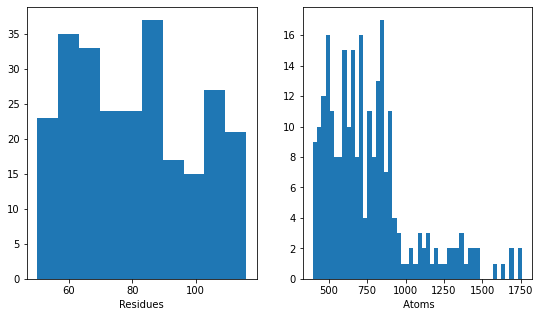

In [14]:
s_sort_256 = s_sort[:256]
plt.figure(figsize=(14,5))

plt.subplot(1,3,1)
plt.hist(s_sort_256.NRES, bins=10)
plt.xlabel("Residues")

plt.subplot(1,3,2)
plt.hist(s_sort_256.DOMAT, bins=50)
plt.xlabel(" Atoms")

In [12]:
levels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for level in levels:
    if not os.path.isdir(f'/workspace7/torchmd-AD/carles_cath/9b_good_train/short_256_levels/level_{level}'):
        os.mkdir(f'/workspace7/torchmd-AD/carles_cath/9b_good_train/short_256_levels/level_{level}')
    elif not os.path.isdir(f'/workspace7/torchmd-AD/carles_cath/9b_good_train/short_256_levels/level_{level}/ground_truth'):
        os.mkdir(f'/workspace7/torchmd-AD/carles_cath/9b_good_train/short_256_levels/level_{level}/ground_truth')

In [13]:
i = 0
prot_x_level = len(s_sort_128) // len(levels)
for index, row in s_sort_128.iterrows():
    prot = row['PDB']
    [tweak_ca(f'/workspace7/torchmd-AD/carles_cath/9b_good_train/short_256_levels/level_{n}/ground_truth', prot) for n in levels]
    i += 1
    if (i % prot_x_level) == 0:
        levels.pop(0)

2022-02-06 14:08:14,023 - moleculekit.molecule - INFO - Removed 348 atoms. 50 atoms remaining in the molecule.
2022-02-06 14:08:14,100 - moleculekit.molecule - INFO - Removed 348 atoms. 50 atoms remaining in the molecule.
2022-02-06 14:08:14,164 - moleculekit.molecule - INFO - Removed 348 atoms. 50 atoms remaining in the molecule.
2022-02-06 14:08:14,230 - moleculekit.molecule - INFO - Removed 348 atoms. 50 atoms remaining in the molecule.
2022-02-06 14:08:14,293 - moleculekit.molecule - INFO - Removed 348 atoms. 50 atoms remaining in the molecule.
2022-02-06 14:08:14,360 - moleculekit.molecule - INFO - Removed 348 atoms. 50 atoms remaining in the molecule.
2022-02-06 14:08:14,437 - moleculekit.molecule - INFO - Removed 348 atoms. 50 atoms remaining in the molecule.
2022-02-06 14:08:14,513 - moleculekit.molecule - INFO - Removed 348 atoms. 50 atoms remaining in the molecule.
2022-02-06 14:08:14,578 - moleculekit.molecule - INFO - Removed 348 atoms. 50 atoms remaining in the molecule.
2

In [15]:
# Create dataset file
f = open(f'/shared/carles/repo/torchmd-exp/datasets/9b_good_short256.txt', "a")

for index, row in s_sort_256.iterrows():
    prot = row['PDB'] + '\n'
    f.write(prot)
f.close()